## Startups profit prediction using multiple linear regression 

### Overview

In this article, we will be predicting the profit from the startups dataset with the features available with us. We're using the 50-startups dataset for this problem statement and we will be using concept of Multiple linear regression to predict the profit of startups companies.

### Table of content

1. Difference between Linear regression and Multiple Linear regression
2. Importing libraries
3. Analyzing the data
4. EDA on dataset
    * Data Visuliazation
    * Feature exploration
5. Model development
6. Model evaluation

### Difference between Linear regression and Multiple linear regression

The major difference between linear regression and multiple linear regression is that in linear regression there is only one independent variable while in the case of Multiple linear regression there are more than one independent variables

Let's take a example of both the scenerios

1. Linear regression: When we want to predict the height of the individual from the weight of that person.
2. Multiple Linear regression: If we blend the above problem statement just a little bit like, if we have the features such as height, age and gender as our features and then we have to predict the weight of the person then we have to use the concept of multiple linear regression.

### Importing libraries

In [1]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

### Importing the dataset

In [2]:
dataset = pd.read_csv('50_Startups.csv')

### Analyzing the data

In [3]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
dataset.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
# Numerical/Statistical analysis of the dataset
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# Dimensions of dataset
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.') 

There are  50 rows and  5 columns in the dataset.


In [7]:
# Here we are trying to check that whether this dataset has any duplicate value or not
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [8]:
# Check for NULL values
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

**Inference :** There are no null values in the dataset  

In [9]:
# Schema of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
# from corr function we can find the correlation between the columns.
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


**Inference:**  We can obseve that all three columns have a **direct relationship with the profit**, which is our target variable.

### EDA on dataset

**Correlation matrix**

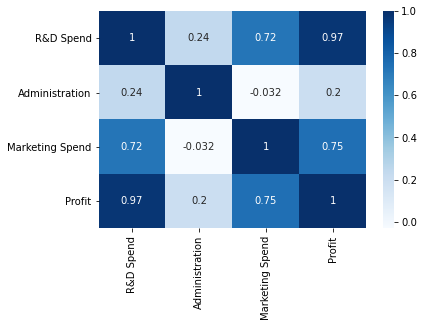

In [11]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

**Inference :** The heatmap of correlation also demonstrates similar insights i.e. **direct relationship with profit**

**Outliers detection** in **target variable**

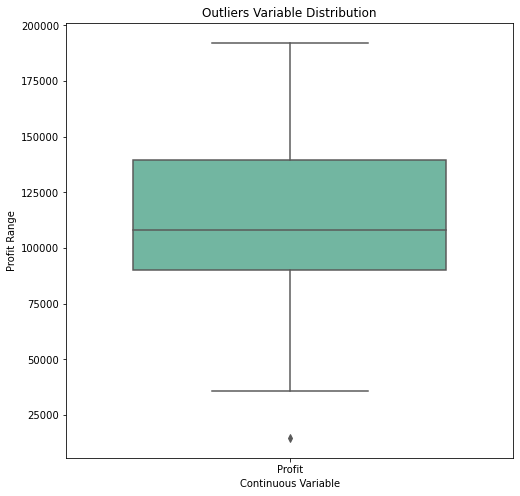

In [12]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

**Inference :** While looking at the **boxplot** we can see the **outliers in the profit(target variable)** ,but the amount of data is not much (just 50 enteries) so it won't create much negative impact

**State wise** outliers detection 

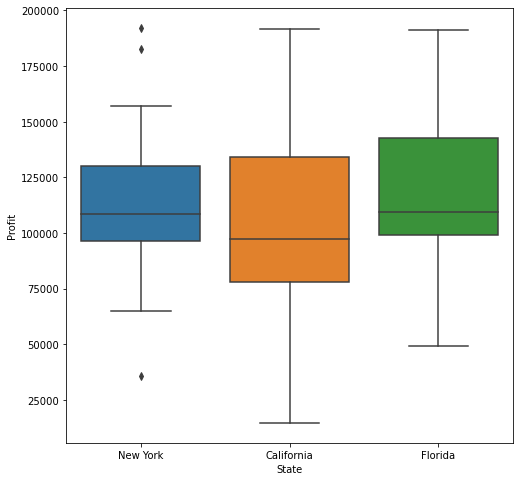

In [13]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

**Insights:**

- All outliers presented are in the state of New York.
- The startups located in the state of California have a greater range between the minimum and the maximum profit.

**Histgram** on Profit

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


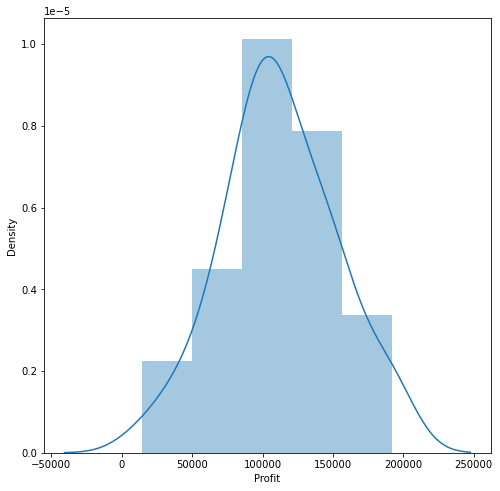

In [14]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

**Inference :** **The average profit (which is 100k)** is the most frequent i.e. it's more likely to be in distribution plot

**Pairplot**

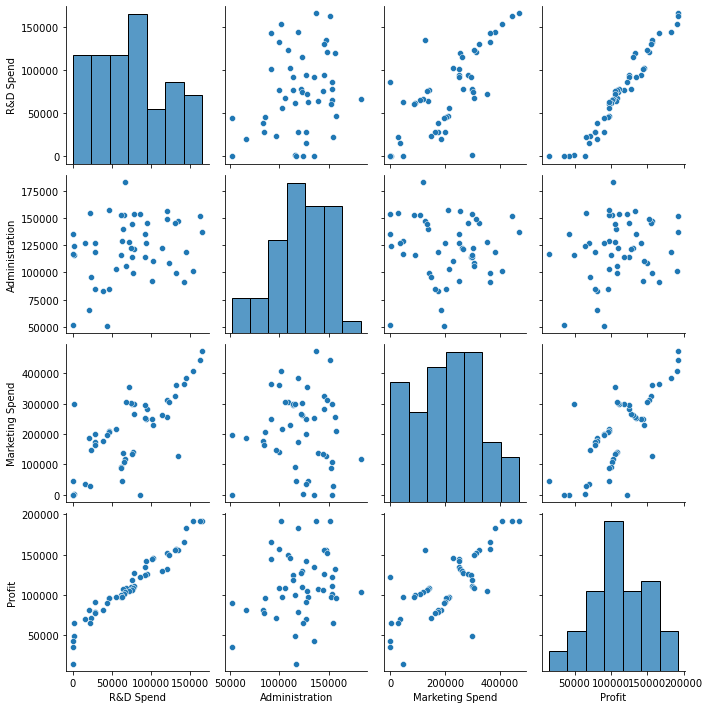

<Figure size 360x360 with 0 Axes>

In [31]:
sns.pairplot(dataset)
plt.figure(figsize=(5,5))
plt.show()

**Inference:**

- As we can see in the pairpot, the more you invest in Research and Development the greater will be your profit.
- The marketing spend seems to be directly proportional (though little bit outliers are there) with the profit.
- The administration spend seems to have no relation with the profit.

### Model Development

In [16]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#### Label Encoder

In [17]:
from sklearn.preprocessing import LabelEncoder

In [32]:
#Label Encoder : Encode labels with value between 0 and n_classes-1.
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2,3
0,165349,136898,471784,2
1,162598,151378,443899,0
2,153442,101146,407935,1
3,144372,118672,383200,2
4,142107,91391.8,366168,1


In [19]:
# Now we have to split the data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[130298.13, 145530.06, 323876.68, 1],
       [119943.24, 156547.42, 256512.92, 1],
       [1000.23, 124153.04, 1903.93, 2],
       [542.05, 51743.15, 0.0, 2],
       [65605.48, 153032.06, 107138.38, 2],
       [114523.61, 122616.84, 261776.23, 2],
       [61994.48, 115641.28, 91131.24, 1],
       [63408.86, 129219.61, 46085.25, 0],
       [78013.11, 121597.55, 264346.06, 0],
       [23640.93, 96189.63, 148001.11, 0],
       [76253.86, 113867.3, 298664.47, 0],
       [15505.73, 127382.3, 35534.17, 2],
       [120542.52, 148718.95, 311613.29, 2],
       [91992.39, 135495.07, 252664.93, 0],
       [64664.71, 139553.16, 137962.62, 0],
       [131876.9, 99814.71, 362861.36, 2],
       [94657.16, 145077.58, 282574.31, 2],
       [28754.33, 118546.05, 172795.67, 0],
       [0.0, 116983.8, 45173.06, 0],
       [162597.7, 151377.59, 443898.53, 0],
       [93863.75, 127320.38, 249839.44, 1],
       [44069.95, 51283.14, 197029.42, 0],
       [77044.01, 99281.34, 140574.81, 2],
       [1346

In [20]:
# Feature Scaling -- Useful when Features have different units

"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)\ny_test = sc_y.fit_transform(y_test)'

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [22]:
y_pred = model.predict(x_test)
y_pred

array([104055.1842384 , 132557.60289702, 133633.01284474,  72336.28081054,
       179658.27210893, 114689.63133397,  66514.82249033,  98461.69321326,
       114294.70487032, 169090.51127461,  96281.907934  ,  88108.30057881,
       110687.1172322 ,  90536.34203081, 127785.3793861 ])

In [23]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9355139722149948
Model Score/Performance on Training data 0.9515496105627431


In [24]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,104055.184238,103282.38
1,132557.602897,144259.40
2,133633.012845,146121.95
3,72336.280811,77798.83
4,179658.272109,191050.39
5,114689.631334,105008.31
6,66514.822490,81229.06
7,98461.693213,97483.56
8,114294.704870,110352.25
9,169090.511275,166187.94


**Inference :**

As we can see that the **predicted value is somewhat near to the actual values**, therefore, we can use this model for prediction. **But first we need to calculate how much is the error generated.**

### Model evaluation

R2 score: R2 score - R squared score. It is one of those statistical approach by which we can find the variance or the spread of the dependent variables with the help of independent data.

In [25]:
from sklearn.metrics import r2_score
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39448007716636


MSE: MSE - Mean Squared Error. By using this approach we can find that how much the regression best fit line is close to all the points.

In [27]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 6224496238.94644


RMSE: RMSE - Root Mean Squared Error. This is the similar to Mean squared error(MSE) approach, the only difference is that here we find the root of mean squared error i.e. root of Mean squared error is equals to Root Mean Squared Error. The reason behind finding the root is to find the more close residual error as compared to the values found by mean squared error.

In [28]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  788954.7666974603


MAE:  MAE - Mean Absolute Error. By using this approach we can find the difference between the actual values and predicted values but that difference is absolute i.e. the difference is positive.

In [26]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6503.577323580025


**Conclusion**

So, the mean absolute error is **6503.577323580025**. Therefore our predicted value can be **6503.577323580025 units greater than or less than the actual value**.